In [1]:
#General Libraries
#import re
#import random
import numpy as np
import scipy as sp
import scipy.signal
import pandas as pd
import sklearn as sk
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import OrderedDict
from sklearn.metrics import median_absolute_error
from numpy import cumsum, log, polyfit, sqrt, std, subtract

C:\Users\FRANK\Anaconda3\envs\qmnew\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Machine Learning Libraries
from sklearn import metrics
from sklearn.svm import NuSVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (f1_score,
                             roc_auc_score,
                             accuracy_score,
                             precision_score,
                             jaccard_similarity_score,
                             recall_score,
                             average_precision_score,
                             brier_score_loss)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\FRANK\Anaconda3\envs\qmnew\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
#Zipline libraries
import alphalens as al
from alphalens import tears
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import Latest
from zipline.pipeline.filters import StaticAssets
from zipline.pipeline import Pipeline, CustomFactor, CustomFilter
from zipline.pipeline.factors import RollingPearsonOfReturns, VWAP
from zipline.pipeline.filters import StaticAssets
from zipline.pipeline.factors import (AverageDollarVolume,
                                      Returns,
                                      RollingPearsonOfReturns)

In [ ]:
#Libraries for upload and download the data
from zipline.data import bundles
from zipline.pipeline.loaders import USEquityPricingLoader
#Library for download the data: open a Data-Portal
from zipline.data.data_portal import DataPortal

In [5]:
#Libraries for process the uploaded data
from zipline.utils.calendars import get_calendar
from zipline.pipeline.data import USEquityPricing
#Main Pipeline Constructor Engine
from zipline.pipeline.engine import SimplePipelineEngine

In [6]:
#Library for select individual or some stocks
from zipline.assets._assets import Equity

***

### Engine Functions - Summary

Uploading Data

In [7]:
bundle_data=bundles.load("random_stock_data")
pricing_loader = USEquityPricingLoader(bundle_data.equity_daily_bar_reader,
                                       bundle_data.adjustment_reader)

Basic Pipeline Engine inc.`USEquityPricing`

In [8]:
# Define the function for the get_loader parameter
def choose_loader(column):
    if column not in USEquityPricing.columns:
        raise Exception('Column not in USEquityPricing')
    return pricing_loader

# Set the trading calendar
trading_calendar = get_calendar('NYSE')

# Create a Pipeline engine
engine = SimplePipelineEngine(get_loader = choose_loader,
                              calendar = trading_calendar.all_sessions,
                              asset_finder = bundle_data.asset_finder)

Create a Data Portal

In [9]:
# Create a data portal
data_portal = DataPortal(bundle_data.asset_finder,
                         trading_calendar = trading_calendar,
                         first_trading_day = bundle_data.equity_daily_bar_reader.first_trading_day,
                         equity_daily_reader = bundle_data.equity_daily_bar_reader,
                         adjustment_reader = bundle_data.adjustment_reader)

Create Universe and empty Pipeline

In [10]:
# Create a screen for our Pipeline
universe = AverageDollarVolume(window_length = 1).top(500)

# Create an empty Pipeline with the given screen
pipeline_ex = Pipeline(screen = universe)

In [11]:
# Set the start and end dates
start_date = pd.Timestamp('2020-01-08', tz = 'utc')
end_date = pd.Timestamp('2020-01-08', tz = 'utc')

# Run our pipeline for the given start and end dates
pipeline_output = engine.run_pipeline(pipeline_ex, start_date, end_date)

# We print information about the pipeline output
print('The pipeline output has type:', type(pipeline_output), '\n')

# We print whether the pipeline output is a MultiIndex Dataframe
print('Is the pipeline output a MultiIndex Dataframe:',
      isinstance(pipeline_output.index, pd.core.index.MultiIndex), '\n')

# If the pipeline output is a MultiIndex Dataframe we print the two levels of the index
if isinstance(pipeline_output.index, pd.core.index.MultiIndex):

    # We print the index level 0
    print('Index Level 0:\n\n', pipeline_output.index.get_level_values(0), '\n')

    # We print the index level 1
    print('Index Level 1:\n\n', pipeline_output.index.get_level_values(1), '\n')

The pipeline output has type: <class 'pandas.core.frame.DataFrame'> 

Is the pipeline output a MultiIndex Dataframe: True 

Index Level 0:

 DatetimeIndex(['2020-01-08', '2020-01-08', '2020-01-08', '2020-01-08',
               '2020-01-08', '2020-01-08', '2020-01-08', '2020-01-08',
               '2020-01-08', '2020-01-08',
               ...
               '2020-01-08', '2020-01-08', '2020-01-08', '2020-01-08',
               '2020-01-08', '2020-01-08', '2020-01-08', '2020-01-08',
               '2020-01-08', '2020-01-08'],
              dtype='datetime64[ns, UTC]', length=480, freq=None) 

Index Level 1:

 Index([     Equity(0 [A]),     Equity(1 [AA]),    Equity(2 [AAL]),
          Equity(3 [AAP]),   Equity(4 [AAPL]),   Equity(5 [ABBV]),
          Equity(6 [ABC]),   Equity(7 [ABMD]),    Equity(8 [ABT]),
          Equity(9 [ACN]),
       ...
        Equity(470 [XOM]),  Equity(471 [XPO]), Equity(472 [XRAY]),
       Equity(473 [YELP]), Equity(474 [YNDX]),  Equity(475 [YUM]),
       Equi

Get Universe Tickers 

In [12]:
# Get the values in index level 1 and save them to a list
universe_tickers = pipeline_output.index.get_level_values(1).values.tolist()

# Display the tickers
universe_tickers

[Equity(0 [A]),
 Equity(1 [AA]),
 Equity(2 [AAL]),
 Equity(3 [AAP]),
 Equity(4 [AAPL]),
 Equity(5 [ABBV]),
 Equity(6 [ABC]),
 Equity(7 [ABMD]),
 Equity(8 [ABT]),
 Equity(9 [ACN]),
 Equity(10 [ADBE]),
 Equity(11 [ADI]),
 Equity(12 [ADM]),
 Equity(13 [ADP]),
 Equity(14 [ADS]),
 Equity(15 [ADSK]),
 Equity(16 [AEO]),
 Equity(17 [AEP]),
 Equity(18 [AES]),
 Equity(19 [AFL]),
 Equity(20 [AGN]),
 Equity(21 [AGNC]),
 Equity(22 [AIG]),
 Equity(23 [AKAM]),
 Equity(24 [ALB]),
 Equity(25 [ALGN]),
 Equity(26 [ALK]),
 Equity(27 [ALL]),
 Equity(28 [ALXN]),
 Equity(29 [AMAT]),
 Equity(30 [AMD]),
 Equity(31 [AMGN]),
 Equity(32 [AMP]),
 Equity(33 [AMT]),
 Equity(34 [AMTD]),
 Equity(35 [AMZN]),
 Equity(36 [ANET]),
 Equity(37 [ANTM]),
 Equity(38 [AON]),
 Equity(39 [APA]),
 Equity(40 [APD]),
 Equity(41 [APH]),
 Equity(42 [APTV]),
 Equity(43 [ATUS]),
 Equity(44 [ATVI]),
 Equity(45 [AVGO]),
 Equity(46 [AXP]),
 Equity(47 [AZO]),
 Equity(48 [BA]),
 Equity(49 [BAC]),
 Equity(50 [BAP]),
 Equity(51 [BAX]),
 Equity

Dowload the Data - `get_pricing()` function

In [13]:
def get_pricing(assets,
                start_date,
                end_date,
                data_portal=data_portal,
                trading_calendar=trading_calendar,
                field='close'):
    
    # Set the given start and end dates to Timestamps. The frequency string C is used to
    # indicate that a CustomBusinessDay DateOffset is used
    end_dt = pd.Timestamp(end_date, tz='UTC', freq='C')
    start_dt = pd.Timestamp(start_date, tz='UTC', freq='C')

    # Get the locations of the start and end dates
    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    # return the historical data for the given window
    return data_portal.get_history_window(assets=assets, end_dt=end_dt,
                                          bar_count=end_loc - start_loc,
                                          frequency='1d',
                                          field=field,
                                          data_frequency='daily')

Example Downloading the data: Universe Tickets 

In [14]:
# Example of downloading the data:

# Get the historical data for the given window
historical_data = get_pricing(universe_tickers,
                              start_date='2019-10-08',
                              end_date='2019-11-08')
# Display the historical data
historical_data.head()

,Equity(0 [A]),Equity(1 [AA]),Equity(2 [AAL]),Equity(3 [AAP]),Equity(4 [AAPL]),Equity(5 [ABBV]),Equity(6 [ABC]),Equity(7 [ABMD]),Equity(8 [ABT]),Equity(9 [ACN]),...,Equity(470 [XOM]),Equity(471 [XPO]),Equity(472 [XRAY]),Equity(473 [YELP]),Equity(474 [YNDX]),Equity(475 [YUM]),Equity(476 [YUMC]),Equity(477 [ZBH]),Equity(478 [ZION]),Equity(479 [ZTS])
2019-10-09 00:00:00+00:00,73.47,18.41,27.07,154.41,227.03,73.30,80.37,159.31,79.50,184.34,...,67.44,69.40,53.56,32.64,35.66,113.33,42.75,133.42,42.42,126.43
2019-10-10 00:00:00+00:00,74.00,18.69,27.18,155.95,230.09,74.45,80.82,162.34,80.14,183.83,...,68.25,71.04,53.91,32.22,35.56,114.33,43.01,134.07,43.21,127.41
2019-10-11 00:00:00+00:00,75.30,19.28,27.36,158.56,236.21,73.63,81.96,169.64,79.63,184.97,...,68.98,74.04,54.11,32.72,29.99,114.45,44.49,136.44,44.09,128.47
2019-10-14 00:00:00+00:00,75.18,19.17,27.62,157.32,235.87,73.76,81.58,176.51,79.82,185.50,...,69.18,74.68,53.49,32.81,30.30,112.82,43.20,135.24,44.15,126.59
2019-10-15 00:00:00+00:00,75.75,19.46,28.27,159.73,235.32,74.50,83.20,177.87,81.98,187.00,...,69.42,75.85,53.74,33.09,30.52,111.30,44.30,137.89,44.76,128.71


***

RISK MODEL 

In [15]:
from sklearn.decomposition import PCA

In [16]:
rs_start ="2019-10-15"
rs_end = "2020-03-31"

In [17]:
stock_returns = get_pricing(
    universe_tickers,
    rs_start,
    rs_end).pct_change()[1:].fillna(0)

In [18]:
stock_returns.head()

,Equity(0 [A]),Equity(1 [AA]),Equity(2 [AAL]),Equity(3 [AAP]),Equity(4 [AAPL]),Equity(5 [ABBV]),Equity(6 [ABC]),Equity(7 [ABMD]),Equity(8 [ABT]),Equity(9 [ACN]),...,Equity(470 [XOM]),Equity(471 [XPO]),Equity(472 [XRAY]),Equity(473 [YELP]),Equity(474 [YNDX]),Equity(475 [YUM]),Equity(476 [YUMC]),Equity(477 [ZBH]),Equity(478 [ZION]),Equity(479 [ZTS])
2019-10-17 00:00:00+00:00,-0.004650,0.059499,-0.004278,0.006144,0.003883,0.005217,0.040093,-0.012033,0.007337,-0.002841,...,-0.001319,0.000260,0.019291,-0.013389,0.002980,-0.009957,0.005476,0.014131,-0.013883,0.004221
2019-10-18 00:00:00+00:00,-0.004672,0.061084,0.010383,-0.001527,0.004803,0.017567,0.001564,-0.006911,0.004977,0.005590,...,-0.007778,-0.002988,-0.000910,-0.006936,-0.017498,0.017487,-0.005673,-0.006498,0.015441,-0.002724
2019-10-21 00:00:00+00:00,0.012203,-0.049675,0.014174,0.015474,0.017343,0.010986,-0.033244,0.003822,-0.013770,0.001390,...,0.016714,0.008210,0.002914,0.015791,0.100773,0.000089,0.004792,-0.000073,0.021243,-0.013035
2019-10-22 00:00:00+00:00,-0.010466,0.012702,-0.012579,-0.000301,-0.002287,0.007374,-0.006924,-0.029210,-0.013595,-0.024661,...,0.005092,0.000646,-0.011805,0.011659,-0.017675,-0.019678,-0.014536,-0.020203,0.052770,-0.028786
2019-10-23 00:00:00+00:00,0.003883,0.026532,0.001062,-0.005181,0.013419,-0.001541,-0.004764,0.046245,0.009064,0.007388,...,0.009553,0.010075,-0.000184,-0.009161,-0.006215,-0.007539,-0.014519,0.002967,-0.002912,-0.008224


In [19]:
def fit_pca(returns,
            num_factor_exposures,
            svd_solver="full"):
    """
    Fit PCA model based on returns
    for Risk Model Asset.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    num_factor_exposures : int
        Number of factors for PCA
    svd_solver: str | Singular Value Decomposition
        The solver to use for the PCA model
        Predefined, we will select "full".
        It uses all the available data to compute
        the comparable reductionallity dimension. 
        See more in: https://bit.ly/3f3KSgR 
    """
    pca_ = PCA(n_components=num_factor_exposures, 
               svd_solver=svd_solver)
    result = pca_.fit(returns)
    return result

In [22]:
num_factor_exposures = 10
pca = fit_pca(stock_returns, num_factor_exposures)

pca.components_

array([[-0.0308073 , -0.06004187, -0.05192923, ..., -0.03396348,
        -0.03227765, -0.03292272],
       [ 0.03543271, -0.02235701,  0.01569105, ..., -0.0091639 ,
         0.01843934,  0.04142101],
       [ 0.02444598, -0.01449093, -0.0487381 , ..., -0.05073897,
         0.01897587, -0.00713675],
       ...,
       [ 0.0148864 , -0.05306742, -0.08127892, ..., -0.01640311,
        -0.00978225,  0.04589914],
       [ 0.00170608, -0.04142486, -0.00101467, ..., -0.02377257,
         0.04032284, -0.03977488],
       [ 0.05670547, -0.04580052, -0.02224985, ..., -0.01459668,
         0.01725807,  0.0357499 ]])

Let's look the PCA's percent of variance explained by each factor selected in the variable `num_factor_exposures`

<BarContainer object of 10 artists>

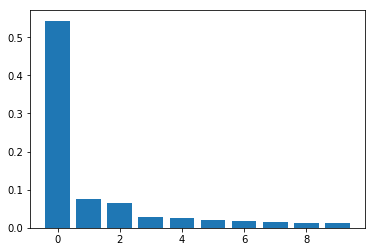

In [23]:
plt.bar(np.arange(num_factor_exposures),
        pca.explained_variance_ratio_)

Calculate the betas on each factor. This will call `factor_betas` to get factor betas from the PCA Model.


In [24]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):
    """
    Get the factor betas from the PCA model
    in order to compute risk-factors.

    Parameters
    ----------
    pca : PCA
        Model fit to returns
    factor_beta_indices : 1 dimensional Ndarray
        Factor beta indices
    factor_beta_columns : 1 dimensional Ndarray
        Factor beta columns
    
    IMPORTANT
    ---------
    factor_beta_indicies: stocks name
    factor_beta_columns: num factor exposures
    """
    assert len(factor_beta_indices.shape) == 1
    assert len(factor_beta_columns.shape) == 1
    
    result = pd.DataFrame(pca.components_.T, 
                          factor_beta_indices, 
                          factor_beta_columns)
    return result

In [25]:
risk_model = {}
#we re-compute stocks name because some stocks could be lost
#during the PCA process after the "stock_returns" computation
stocks_name =stock_returns.columns.values

risk_model['factor_betas'] = factor_betas(pca,
                                          stocks_name,
                                          np.arange(num_factor_exposures))

In [26]:
#the following result is the beta calculated for each risk factor by stock
#remember that each risk factor is the factor exposure was computed
#in the PCA statement; therefore, we got same 'n' risk factor exposures
#as the number of the variable 'num_factor_exposures'

risk_model["factor_betas"].head()

,0,1,2,3,4,5,6,7,8,9
Equity(0 [A]),-0.030807,0.035433,0.024446,-0.003850,-0.015608,0.042331,-0.018736,0.014886,0.001706,0.056705
Equity(1 [AA]),-0.060042,-0.022357,-0.014491,0.086543,-0.033562,0.047768,0.070014,-0.053067,-0.041425,-0.045801
Equity(2 [AAL]),-0.051929,0.015691,-0.048738,0.215379,0.023683,0.134030,-0.049321,-0.081279,-0.001015,-0.022250
Equity(3 [AAP]),-0.034647,0.044963,-0.017632,0.001522,0.052413,-0.004429,0.009983,-0.022164,0.075090,-0.064306
Equity(4 [AAPL]),-0.039578,0.030349,0.024026,-0.007505,-0.017878,0.006548,0.024247,0.018519,0.004026,-0.000060


Find the returns on each risk-factor:

In [27]:
def factor_returns(pca,
                   returns,
                   factor_return_indices,
                   factor_return_columns):
    """
    Get the factor returns from the PCA model.

    Parameters
    ----------
    pca : PCA
        Model fit to returns
    returns : DataFrame
        Returns for each ticker and date
    factor_return_indices : 1 dimensional Ndarray
        Factor return indices
    factor_return_columns : 1 dimensional Ndarray
        Factor return columns

    IMPORTANT
    ---------
    factor_beta_indicies: stocks name array-list
    factor_return_columns: number factor exposures 
    """
    assert len(factor_return_indices.shape) == 1
    assert len(factor_return_columns.shape) == 1
    
    result = pd.DataFrame(pca.transform(returns),
                          factor_return_indices,
                          factor_return_columns)
    
    return result

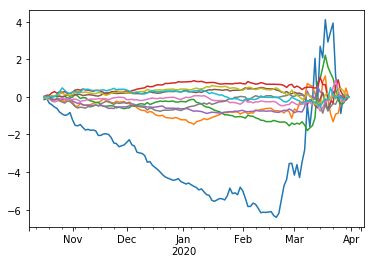

In [28]:
risk_model['factor_returns'] = factor_returns(
    pca,
    stock_returns,
    stock_returns.index,
    np.arange(num_factor_exposures))

risk_model['factor_returns'].cumsum().plot(legend=False)

In [29]:
def factor_cov_matrix(factor_returns, ann_factor):
    """
    Get the factor covariance matrix
    in order to compute a Risk Model.
    Remember each covariance matrix
    is based on each "factors exposures".


    Parameters
    ----------
    factor_returns : DataFrame
        Factor returns
    ann_factor : int
        Annualization factor
    
    IMPORTANT
    ---------
    ann_factor : you can give every value you want
                 '252' is advisible
                 
    Output
    -------
    factor_cov_matrix : 2 dimensional Ndarray
        Factor covariance matrix
        NxN where N is the "number of factor exposures"
    """
    
    result = np.diag(factor_returns.var(axis=0,
                                        ddof=1))*ann_factor
    
    return result

In [30]:
ann_factor = 252
risk_model['factor_cov_matrix'] = factor_cov_matrix(
    risk_model['factor_returns'],
    ann_factor
)
risk_model['factor_cov_matrix']

array([[119.10427707,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  16.59228266,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  14.29327232,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   6.15897637,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          5.60719741,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   4.49702961,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [31]:
def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
    """
    Get the idiosyncratic variance matrix
    to calculate the idiosyncratic risk of each asset
    based on the computed factor exposures.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    factor_returns : DataFrame
        Factor returns
    factor_betas : DataFrame
        Factor betas
    ann_factor : int
        Annualization factor
    """
    #dot product that could find the commom returns
    #remember:"commom returns" that belongs to each factor exposure
    #therefore, we should substract this returns amount
    #from the original obtained returns
    #the core idea is to find the return that belongs ONLY
    #to the alpha factors and not to the factor risk exposures
    common_ret = pd.DataFrame(np.dot(factor_returns,
                                         factor_betas.T),
                                  returns.index,
                                  returns.columns)
    s_returns = returns - common_ret
    
    final_df = pd.DataFrame(np.diag(np.var(s_returns))*ann_factor,
                            returns.columns,
                            returns.columns)
    return final_df

In [32]:
risk_model['idiosyncratic_var_matrix'] = idiosyncratic_var_matrix(stock_returns,
                                                                  risk_model['factor_returns'],
                                                                  risk_model['factor_betas'],
                                                                  ann_factor)
risk_model['idiosyncratic_var_matrix']

,Equity(0 [A]),Equity(1 [AA]),Equity(2 [AAL]),Equity(3 [AAP]),Equity(4 [AAPL]),Equity(5 [ABBV]),Equity(6 [ABC]),Equity(7 [ABMD]),Equity(8 [ABT]),Equity(9 [ACN]),...,Equity(470 [XOM]),Equity(471 [XPO]),Equity(472 [XRAY]),Equity(473 [YELP]),Equity(474 [YNDX]),Equity(475 [YUM]),Equity(476 [YUMC]),Equity(477 [ZBH]),Equity(478 [ZION]),Equity(479 [ZTS])
Equity(0 [A]),0.019861,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(1 [AA]),0.000000,0.166942,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(2 [AAL]),0.000000,0.000000,0.156252,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(3 [AAP]),0.000000,0.000000,0.000000,0.079579,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(4 [AAPL]),0.000000,0.000000,0.000000,0.000000,0.035709,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(5 [ABBV]),0.000000,0.000000,0.000000,0.000000,0.000000,0.050199,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(6 [ABC]),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04889,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(7 [ABMD]),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.291972,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(8 [ABT]),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.020353,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(9 [ACN]),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.02955,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
def idiosyncratic_var_vector(returns, idiosyncratic_var_matrix):
    """
    Get the idiosyncratic variance vector
    which represent the idiosyncratic risk
    for each asset based on its factor risk.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    idiosyncratic_var_matrix : DataFrame
        Idiosyncratic variance matrix
        Previos function: idiosyncratic_var_matrix()

    Returns
    -------
    idiosyncratic_var_vector : DataFrame
        Idiosyncratic variance Vector
    """
    
    result = pd.DataFrame(np.diag(idiosyncratic_var_matrix),
                          returns.columns)
    return result

In [34]:
risk_model['idiosyncratic_var_vector'] = idiosyncratic_var_vector(stock_returns,
                                                                  risk_model['idiosyncratic_var_matrix'])
risk_model['idiosyncratic_var_vector'].head()

,0
Equity(0 [A]),0.019861
Equity(1 [AA]),0.166942
Equity(2 [AAL]),0.156252
Equity(3 [AAP]),0.079579
Equity(4 [AAPL]),0.035709


## Predict the Portfolio Risk using the Risk Model
Using the data we calculated in the risk model, implement `predict_portfolio_risk` to predict the portfolio risk using the formula $ \sqrt{X^{T}(BFB^{T} + S)X} $ where:
- $ X $ is the portfolio weights
- $ B $ is the factor betas
- $ F $ is the factor covariance matrix
- $ S $ is the idiosyncratic variance matrix

In [35]:
def predict_portfolio_risk(factor_betas, 
                           factor_cov_matrix,
                           idiosyncratic_var_matrix,
                           weights):
    """
    Get the predicted portfolio risk.
    The result would be in %.
    
    Formula for predicted portfolio risk is sqrt(X.T(BFB.T + S)X) where:
      X is the portfolio weights
      B is the factor betas
      F is the factor covariance matrix
      S is the idiosyncratic variance matrix

    Parameters
    ----------
    factor_betas : DataFrame
        Factor betas
    factor_cov_matrix : 2 dimensional Ndarray
        Factor covariance matrix
    idiosyncratic_var_matrix : DataFrame
        Idiosyncratic variance matrix
    weights : DataFrame
        Portfolio weights
        
        IMPORTANT:
        We will compute an equal portfolio weights
        for all the assets in our ideal portfolio.
        This means that, for instance, if we have
        4 assets, we will allocate 25% each of our
        main capital. 
        Later, we will optimice this weights 
        with the 'alph factors' we'll compute.
    

    Returns
    -------
    predicted_portfolio_risk : float
        Predicted portfolio risk
    """
    assert len(factor_cov_matrix.shape) == 2
    
    asset_variance = np.dot(np.dot(factor_betas,
                                   factor_cov_matrix),
                            factor_betas.T) + idiosyncratic_var_matrix
    portfolio_variance = np.dot(np.dot(weights.T, asset_variance), weights)
    
    square_root = np.sqrt(portfolio_variance[0][0])
    return square_root

In [36]:
#equal portfolio weight for each asset
#statement 'np.repeat' follow as np.repeat(A,B)
#repeats B times the A value
#we assign this as a value in a pd.DataFrame
#where the index is each asset
#so we got, like 'X' and 'Z' as stocks in the row axis
#and, in that example, 0.5 and 0.5 for each row in column axis
all_weights = pd.DataFrame(np.repeat(1/len(universe_tickers),
                                     len(universe_tickers)),
                           universe_tickers)

In [37]:
predict_portfolio_risk(
    risk_model['factor_betas'],
    risk_model['factor_cov_matrix'],
    risk_model['idiosyncratic_var_matrix'],
    all_weights)

0.46672871087832607

***

***

***

### RCA - Algorithm

STEP 1: Definición de parámetros de filtro

In [38]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    b, a = sp.signal.butter(order, 
                            normal_cutoff, 
                            btype='low', 
                            analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = sp.signal.filtfilt(b, a, data)
    return y

In [39]:
fs = 33
cutoff = 2.3
order  = 10 

STEP 2: Parámetros de análisis

    Fechas de análisis
    Background de entrenamiento (learning_tf)
    Periodo de agrupamiento significativo (n_fwd_days = main_window)
    Retorno a forecastear (return_to_analyse)
    Cantidad de Kfolds
    Periodos de hold

In [40]:
start_date = "2020-02-12"
end_date = "2020-04-15"
#------------------------------------------------------------#
main_window = 90 #learning_tf
n_fwd_days= 5 #main_window from the template notebook
return_to_analyse = '2D'
#------------------------------------------------------------#
periodos_d = (1,2,3,5,7)
#------------------------------------------------------------#
number_folds = 2 

2.1. Modelo (no modificable)

In [41]:
Models_classificators = 'r_svm' #model

 2.2. Genetización de inputs (no modificable)

In [42]:
start = pd.Timestamp(start_date)
end = pd.Timestamp(end_date)
days_alph_1st = int(periodos_d[-1] * 4)
new_start = start + pd.Timedelta(days=days_alph_1st) 
new_end = end + pd.Timedelta(days=days_alph_1st)

#this timestamp setting is for align dates to trading calendar format type
start_date = pd.Timestamp(start_date, tz = 'utc')
end_date = pd.Timestamp(end_date, tz = 'utc')
new_start = pd.Timestamp(new_start, tz = 'utc')
new_end = pd.Timestamp(new_end, tz = 'utc')

KFold Definition

In [43]:
#kfd = KFold(main_window,
#            number_folds)

kfd = KFold(n_splits=2, 
            random_state=None,
            shuffle=False)

STEP 3: Ordenamiento de los factores (FUNC. 'MAKE_FACTORS')

In [44]:
window_past = n_fwd_days

In [45]:
from scipy.stats import pearsonr 

In [46]:
from zipline.pipeline.data import USEquityPricing as pricelib

def make_factors():
    
    #FACTORES ALPHA:
    rank_volume=pricelib.volume.latest.rank()

    a3= pricelib.open.latest/pricelib.close.latest #.pearsonr(target=rank_volume,
                                                   #          correlation_length=2)
    
    #add = sp.stats.pearsonr(a3,rank_volume)#.rolling(window=10)

    class Alpha9(CustomFactor):
        inputs=[pricelib.high]
        window_length=5
        def compute(self,today,assets,out,close):
            def fit_test(close):
                x=0
                if min((close[-1]-close[-2]),close[0])>0 or min((close[-1]-close[-2]),close[0])>0:
                    x=close[-1]-close[-2]
                else:
                    x=-1*(close[-1]-close[-2])
                return x
            out[:]=np.apply_along_axis(fit_test, 0, close) 
    
    a9=Alpha9()
    
    class Alpha12(CustomFactor):
        inputs=[pricelib.close,pricelib.volume]
        window_length=2
        def compute(self,today,assets,out,close,volume):
            out[:]=np.sign(volume[-1]-volume[0])*(-1*(close[-1]-close[0])) 
    
    a12=Alpha12()
    
    class Alpha101(CustomFactor):
        inputs=[pricelib.low,pricelib.close,pricelib.high,pricelib.open]
        window_length=1
        def compute(self,today,assets,out,low,close,high,open):
            out[:]=((close-open)/((high-low)+0.001))

    a101=Alpha101()
    
    alpha_mean=(a3+a9+a12+a101)/4#>20%
    alpha_product=(a3*a9*a12*a101)#>35%
    
    new_alpha1=(a3**2)+(a9**2)+(a12**2)+(a101**2)
    new_alpha2=a3**4+a9**3+a12**2+a101
    new_alpha3=a101**4+a12**3+a9**2+a3
    new_alpha6=(a9**5+a9*4+a9**3+a9**2+a9)/4
    new_alpha7=(a3**4+a3**3+a3**2+a3)/4
    new_alpha9=(a12**4+a12**3+a12**2+a12)/4
    new_alpha10=(a101**4+a101**3+a101**2+a101)/4
    new_alpha12=(new_alpha6+new_alpha7+
                 new_alpha9 +new_alpha10)/4
    new_alpha13=alpha_product.abs()**(.5)
    
    new_alpha16=(a3+a9+a12+a101+alpha_mean+new_alpha2
                 +new_alpha3+new_alpha6+new_alpha7+
                 new_alpha9+new_alpha10+new_alpha12+
                 new_alpha13+new_alpha1+alpha_product)/16
    
    
    # Retornamos los facto9+new_alpha3es en el Pipeline
    # Incluimos el criterio para extracción de data     
             
    all_factors = {
            'alpha_2':new_alpha3,           
            'alpha_3':new_alpha16
    }       
    return all_factors

In [47]:
factors = make_factors()

In [48]:
#if you want to see only the 2 factors computed, uncoment the codes below

#pipeline_ = Pipeline(screen=universe,columns=factors)
#engine.run_pipeline(pipeline_, start_date, end_date)

In [49]:
target_variables = list(factors.keys())
target_variables.insert(0,return_to_analyse)
target_variables

['2D', 'alpha_2', 'alpha_3']

STEP 4: Funciones del Filtro y Correlación

In [50]:
def correlacion(v1,v2,window):
    #genera el moving correlation entre 2 signals
    return sp.array([sp.corrcoef(v1[i:i+window] , v2[i:i+window] )[0,1] for i in range(len(v1)-window)])

def correlacion_mayor_a(v1,v2,window,umbral):
    arr1 = []
    arr2 = []
    for i in range(len(v1)) :
        tempv1 = v1[i:i+window]
        tempv2 = v2[i:i+window] 
        
        resTemp=sp.corrcoef(tempv1 , tempv2)[0,1]
        
        if abs(resTemp) > umbral:
            arr1.append(tempv1)
            arr2.append(tempv2)
        else: 
            arr1.append(np.array([0] * window_past))
            arr2.append(np.array([0] * window_past))
    return [arr1,arr2]      
            
#Genera las graficas de correlacion y suavizado de la senial
def normalizeCorr(dataframe,
                  targets = target_variables , 
                  dicFreq = {"fs":fs,"cutoff":cutoff,"order":order},#parametros del filtro pasa bajas
                  targetValue = return_to_analyse,#valor a contra cualquier la correlacion
                  window = 10,#ventana del moving  correlation
                  umbral = 0.5):# umbral para el conteo de valores utiles
    multiple = {} 
#calcula los parametros
    for target in targets:

        #print dataframe[target].head()                   #DATOS ORIGINALES X TARGET(ALPHA FACTOR)
        #print dataframe[target]/ dataframe[target].max() #PARA NORMALIZACION
        
        
        #multiple.update({target:dataframe[target].values/dataframe[target].max()}) #NORMALIZACION NO REQ.
        
        multiple.update({target :  dataframe[target].values}) #ACTUALIZACION REQUERIDA. CUANDO NO SE NORM.

        
        #calcula el valor normalizado de las signals objetivo
        #realiza el único proceso de filtro sobre los factores alpha
        
        #EL FILTRO SOBRE C/ ALPHA FACTOR
        multiple.update({"soft_"+target : butter_lowpass_filter(multiple[target],
                                               dicFreq["cutoff"],
                                               dicFreq["fs"],dicFreq["order"]) })
        
        
        ##multiple.update({"soft_"+target :  dataframe[target].values})
        
        
        #Aplica el filtro pasabajas con los parametros indicados
        
        if  target  != targetValue : #para hallar las correlaciones se generan los valores en la ventana 
            #de tiempo ingresada cualesquiera
            temp = correlacion(multiple["soft_"+target] , multiple["soft_"+targetValue],window)
            
            #Guarda los datos de la correlacion que superan un umbral
            corrumbral = correlacion_mayor_a(v1=multiple["soft_"+target],
                                             v2=multiple["soft_"+targetValue],
                                             window=window,
                                             umbral=umbral)
            #genera la correlacion
                
            multiple.update({"soft_"+target+"_plot_soft_"+targetValue: temp.copy() })
            #Guarda los datos de la correlacion que superan un umbral
            multiple.update({"bloques_"+target:corrumbral})
            
            
            
            #Filtramos los parametros utiles de la correlacion
            c1 = temp[temp>umbral].size
            c2 = temp[temp<-umbral].size
            #porcentaje de cuantos valores utiles se tienen
            util = 100*(c1*1.0+c2*1.0)/temp.size
            #numero total de valores 
            totales = c1+c2
            dUtil = {"umbralMayor":c1,"umbralMenor":c2,"pUtil":util,"totales":totales}
            
            multiple.update({"soft_"+target + "_"+targetValue + "_util":dUtil})
            
    return multiple

In [51]:
def setting_order_to_variable_names(list_names):
    list_keys = []
    for numb in range(0,len(list_names)):
        list_keys.append("VAR_" + str(numb))
    final_dict=dict(zip(list_names,list_keys))
    return final_dict

In [52]:
def create_list_params_selected(variable_names):
    list_params = []
    for name in variable_names:
        list_params.append(params[name][0])
    return list_params

In [53]:
def create_pandas(list_of_parameters,params_name):
    list_df = []
    for idx,array in enumerate(list_of_parameters):
        comp_name = setting_order_to_variable_names(params_name)[params_name[idx]]
        lista_lista = [list(i) for i in array]
        data = pd.DataFrame(lista_lista).values
        df=pd.DataFrame(data,
                        columns=[[str(i)+"D_"+comp_name for i in range(1,window_past+1)]])
        list_df.append(df)
    return list_df

In [54]:
def dropping_non_corr_values(parametros, dataframe):
    
    params_name = [i for i in parametros.keys() if "bloque" in i]
    parametros_list = create_list_params_selected(params_name)
    df_with_zeros = pd.concat(create_pandas(parametros_list,params_name),axis=1)
                                     
    return df_with_zeros

STEP 5: Rellenado Gaussiano (def. funciones)

In [55]:
class GaussianMixture():
    def __init__(self, mu, var, p):
        self.mu = mu
        self.var = var    
        self.p = p
def init(X, K,
         seed = 0):
    np.random.seed(seed)
    n, _ = X.shape
    p = np.ones(K) / K
    mu = X[np.random.choice(n, K, replace=False)] 
    var = np.zeros(K)
    for j in range(K):
        var[j] = ((X - mu[j])**2).mean() 
    mixture = GaussianMixture(mu, var, p)
    post = np.ones((n, K)) / K
    return mixture, post 

def rmse(X, Y):
    return np.sqrt(np.mean((X - Y)**2))

def bic(X, mixture,
        log_likelihood):
    n,d = X.shape
    LL = log_likelihood
    p = d*mixture.mu.shape[0] + mixture.var.shape[0] + mixture.p.shape[0]
    return LL-1/2*(p-1)*np.log(n) 

def estep(X, mixture):

    n, d = X.shape
    K, _ = mixture.mu.shape
    post = np.zeros((n, K))

    def fuj(p,x,var,mu,d):
        if len(x.shape) == 1:
            problog = np.log(p)-(d/2)*np.log(2*np.pi*var)-(np.linalg.norm(x-mu,axis=0)**2)/(2*var)
        else:
            problog = np.log(p)-(d/2)*np.log(2*np.pi*var)-(np.linalg.norm(x-mu,axis=1)**2)/(2*var)
        return problog

    log_likelihood = 0
    for i in range(n):
        Mu = None
        indexs = np.where(X[i,:] != 0)
        tiled_vector = np.tile(X[i, :][X[i,:] != 0], (K, 1)) 
        Mu = np.zeros((mixture.mu.shape[0],len(indexs[0])))
        for j in range(mixture.mu.shape[0]):
            Mu[j,:] = mixture.mu[j][indexs] 
        #Yfuj = logsumexp(fuj(mixture.p,tiled_vector,mixture.var,Mu,tiled_vector.shape[1]))
        Yfuj = fuj(mixture.p,tiled_vector,mixture.var,Mu,tiled_vector.shape[1])
        Yfuj = np.log((np.exp(Yfuj)).sum())
        post[i, :] = np.exp(fuj(mixture.p,tiled_vector,mixture.var,Mu,tiled_vector.shape[1])-Yfuj)+1e-16
        log_likelihood += Yfuj

    return post,log_likelihood



def mstep(X, post, mixture,min_variance = .25):
    n, d = X.shape
    _, K = post.shape
    n_hat = post.sum(axis=0) 
    p = n_hat / n
    delta = np.ones((n,d))
    mu = np.zeros((K, d))
    var = np.zeros(K)
    normal = np.zeros(n)
    dist = np.zeros(n) 
    for i in range(n):
        indexs = np.where(X[i,:] == 0.)
        delta[i][indexs] =  np.zeros((len(indexs[0]),))
    for j in range(K):
        for l in range(d):
            if (delta[:,l]*post[:,j]).sum() >= 1:
                mu[j,l] = ((delta[:,l]*post[:,j]*X[:,l]).sum())/((delta[:,l]*post[:,j]).sum()) 
            else:
                mu[j,l] = mixture.mu[j,l]
        for kk in range(n):
            indexs = np.where(X[kk,:] != 0.)
            normal[kk] = (np.linalg.norm(X[kk,:][indexs]-mu[j,:][indexs],axis=0)**2)                                                                     
            dist[kk] = delta[kk,:].sum()                                                 
        var[j] = ((post[:,j]*normal).sum())/((dist*post[:,j]).sum())
        if var[j] <= min_variance:
            var[j] = min_variance
    return GaussianMixture(mu, var, p)    
 

def run(X, mixture,post):
    prev_log_likelihood = None
    log_likelihood = None
    while (prev_log_likelihood is None or log_likelihood - prev_log_likelihood > 1e-6 * np.abs(log_likelihood)):
        prev_log_likelihood = log_likelihood
        post, log_likelihood = estep(X, mixture)
        mixture = mstep(X, post,mixture)
    return mixture, post, log_likelihood

def fill_matrix(X, mixture):
    n, d = X.shape
    K,_ = mixture[0].shape
    delta_inv = np.zeros((n,d))
    for i in range(n):
        indexs = np.where(X[i,:] == 0.)
        delta_inv[i][indexs] =  np.ones((len(indexs[0]),))    
    post,_ = estep(X,mixture)  
    X_prev = np.zeros((n,d))
    for t in range(n):
        for l in range(d):
            X_prev[t,l] = ((post[t,:]*np.transpose(mixture.mu[:,l])).sum())/((post[t,:]).sum())
    return X_prev*delta_inv+X

In [56]:
def gaussian_filter(df_with_zeros_var):
    X = df_with_zeros_var.values
    K = 2
    semillas = 19
    Result = run(X,init(X, K,semillas)[0],init(X, K,semillas)[1])
    mixture = Result[0]
    n, d = X.shape
    K,_ = mixture.mu.shape
    delta_inv = np.zeros((n,d))
    for i in range(n):
        indexs = np.where(X[i,:] == 0.)
        delta_inv[i][indexs] =  np.ones((len(indexs[0]),))

    post,_ = estep(X,mixture)
    X_prev = np.zeros((n,d))
    for t in range(n):
        for l in range(d):
            X_prev[t,l] = ((post[t,:]*np.transpose(mixture.mu[:,l])).sum())/((post[t,:]).sum())

    X_pred = X_prev*delta_inv+X
    
    X_pred = pd.DataFrame(X_pred)
    return X_pred

STEP 6: Función del modelo Classificador NuSVC

In [57]:
def function_models(nombre_modelo):
    
    if nombre_modelo.lower() == 'r_svm':
        selected_model = NuSVC(verbose=True,
                               max_iter=-1,
                               shrinking=True,
                               random_state=None,
                               probability=True)
        
        list_nus = [0.01]
        list_kernels = ["rbf", "sigmoid"]  
        list_coef0 = [0.0,.1,.5,.9]
        
        tuned_params = {'nu':list_nus,
                        'kernel':list_kernels,
                        'coef0':list_coef0}
        
    else:
        "No recognized model. Only SupportVectorMachine available"
        
    return tuned_params,selected_model

STEP 7: Funciones KFoldGridSearch

In [58]:
def funcion_grid(nombre_modelo,x_train,y_train):
    
    score = make_scorer(roc_auc_score)
    
    parametros_tuneados,modelo_seleccionado=function_models(nombre_modelo)[0],function_models(nombre_modelo)[1]
    
    model = GridSearchCV(estimator = modelo_seleccionado,
                         param_grid=parametros_tuneados,
                         cv=2,scoring=score,n_jobs=5,
                         pre_dispatch=2)
    
    model = model.fit(x_train,y_train)
    
    return model.best_estimator_ 

In [59]:
# model_selected = model (string)
def k_fold_grid_search(kfold,X,y,model_selected):
    
    dict_models_score_fold = {}
    
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        modeloTemp=funcion_grid(model_selected,X_train,y_train) #base model 
        
        dict_models_score_fold[modeloTemp] = modeloTemp.score(X_test,y_test) #value: score test-set
    
    selected_model = max(dict_models_score_fold,
                         key=dict_models_score_fold.get)
    best_fold_score = dict_models_score_fold[selected_model]
    
    return selected_model, best_fold_score

STEP 8: Funciones de administración de datos del Pipeline

In [60]:
# Función shift_mask_data: 
# permite laggear X & Y con base a la ventana temporal escogida (n_fwd_days)
def shift_mask_data(X, Y, Ret, n_fwd_days=1):
    
    shifted_X = np.roll(X, n_fwd_days+1, axis=0)

    X = shifted_X[n_fwd_days+1:]
    Y = Y[n_fwd_days+1:]
    Ret = Ret[n_fwd_days+1:].flatten()
    
    Y_binary = (Y>0.0).astype(int).flatten()

    return X,Y_binary,Ret

In [61]:
# Variable general de normalización:
# normalización en escala predefinida para tanto el valor de entrenamiento como para los valores para predecir
# se ha decidido por usar una normalización MinMax de escala 0.1-0.9 dado que no existen valores cero posibles
# principalmente, debido al efecto del rellenado gaussiano, por lo que se ha decidodo emplear este proceso
# de normalización a fin de evitar el sesgo predictivo
scal = preprocessing.MinMaxScaler(feature_range=(0.1,0.9))

In [62]:
# Función Roller Coaster Algorithm:
# la función resume el proceso de FCG y de obtención de parámetros finales del modelo
# engloba todo en una unidad de código a fin de que sea fácilmente manipulable
# retorna el modelo final tuneado en la búsqueda KFoldGrid para c/ activo
def global_roller_coaster_function(df_fcg,
                                   array_y_binary,
                                   number_folds,
                                   modeloML,
                                   window_past=window_past):
    
    #0) normalización en escala predefinida para train/testl dataset o 'df' 
    
    global params
    
    df_fcg = df_fcg.reset_index(drop=True)
    
    df_factors_normalized = pd.DataFrame(scal.fit_transform(df_fcg[list(df_fcg.columns)[1:]]),
                                         columns = list(df_fcg.columns[1:]))
    df_fcg = pd.concat([df_fcg.iloc[:,[0]],df_factors_normalized],axis=1) #new df

    #1) estimacion de parametros
    params = normalizeCorr(dataframe=df_fcg,
                           window=window_past) #here to new_df
    
    
    #2) calculo de correlacion y eliminacion de los val no significativos
    df_out_with_zeros =dropping_non_corr_values(params,
                                                df_fcg) #here to new_df | contain NaN's
    
    #3) eliminacion NaN's values sin eliminar filas o rellenar con data randomnly 
    df_transformed = df_out_with_zeros.fillna(0) #NaN's to zero

    #4) rellenado con el metodo gaussiano: retorna un DF.| OP
    df_filtered_gaussian =gaussian_filter(df_transformed)

    #5) seleccionar el valor de X  (variable X_f) | 'Y' fue seleccionado arriba
    X_f = df_filtered_gaussian.values #elegir los df de cualquiera de los pasos 3-4
    
    
    #6) definiendo parámetros del KFold
    #kfd = KFold(df_filtered_gaussian.shape[0],
    #            number_folds)
    
    kfd = KFold(n_splits=number_folds, 
            random_state=None,
            shuffle=False)
    
    #7) encontrando parametros finales
    final_parameters = k_fold_grid_search(kfd, 
                                          X_f,
                                          array_y_binary,
                                          modeloML)
    
    return final_parameters[0] #retorna el modelo entrenado listo para predecir

In [63]:
# Función ordenadora de datos:
# permite obtener el ordenamiento bidimensional de la data (STOCKS * VARIABLES) 
# devuelve un array transpuesto donde se componen de todas las acciones 
# y dentro de este array de c/acción están las variables para esa unidad de tiempo
# que serán útiles para la predicción
def get_last_values(input_data):
    last_values = []
    for dataset in input_data:
        new_dataset=scal.fit_transform(np.nan_to_num(dataset))
        last_values.append(new_dataset[-n_fwd_days:])
    return np.vstack(last_values).T

STEP 9: Clase ML

In [64]:
#obtenemos la cantidad de acciones que vamos a analizar
#este valor sirve para realizar el proceso de ML en cada accion
#si una accion no tiene valores para una unidad de tiempo dada
#podrá lidiar con los valores nan suprimiendo la accion para el final
#utiliza un pipeline vacío con solo el screen=universe general
number_stocks = pipeline_output.index.get_level_values(1).shape[0]

In [65]:
# CLASE "ML":
# La siguiente clase es el componente principal del único Pipeline. Tiene por fin englobar el proceso
# tanto de obtención de data, entrenamiento, testeo y predicción para ciertos intervalos temporales.
# Asimismo, permite canalizar lo obtenido a partir de todos estos procesos en una sola señal
# útil para el análisis de resultados con el Alphalens.
# En ese sentido, la clase ML funciona como un factor (de ahí que se use CustomFactor).
class ML(CustomFactor):
    init = False
    def compute(self, today, assets, out, returns, *inputs):
        # Los Inputs son arrays tridimensionales: (tiempo, stocks y factores)
        # Los retornos son arrays bidimensionales: (tiempo y stocks)
        # El proceso de iniciación del aprendizaje del modelo ML no se hace a diario:
        # Se codifica un constraint en el statement del "if" que dice: 
        # "si es lunes ('today.weekday() == 0'), entones entrena al modelo".
        # Asimismo, agrega: "si el entrenamiento no ha sido iniciado antes (not self.init), entonces entrena".
        # Todo caso contrario a este no generará una actualización de los modelos y los parámetros obtenidos.
        # Este constraint puede eliminarse y setearse un entrenamiento diario.
        # Esto último quintuplicaría la demora del proceso (al ejecutarse ya no una vez a la semana, sino 5)
        if (not self.init) or (today.weekday() == 0):
            
            global dictModelsAsset #seteamos el diccionario con cada modelo por acción como variable global
            X = np.dstack(inputs) #aplicamos un dstack a los inputs para el ordenamiento de las dimensiones
            Y = returns #retornos entra como input tal cual
            
            #aplicamos la función shift_mask_data para obtener los valores deseados 
            X_1, Y_1, shifted_returns = shift_mask_data(X, Y, 
                                                        returns,
                                                        n_fwd_days=n_fwd_days) #Y: binary returns
            
            #i) Creamos un DF Multiindex Central | index 0: tiempo | index 1: acción | columnas: factores 
                #Creamos el DF con la data de los factores (factor x retrazo temporal)
            index = pd.MultiIndex.from_product([range(s)for s in X_1.shape])
            df_temp = pd.DataFrame({'A': X_1.flatten()}, index=index)['A']
            df = df_temp.unstack(level=2).swaplevel().swaplevel().sort_index()
            df.columns,df.index.names = target_variables[1:],['DATE', 'ASSET']
                #Creamos y añadimos una columna con la variable retorno (Y values): Discreta y continua
            df[target_variables[0]] = shifted_returns
            df[target_variables[0]+"_binary"] = Y_1
                #Revertimos el ordenamiento de las columnas para que coincida con las funciones FCG
            df = df[list(reversed(df.columns))]#.fillna(-1)

            #ii) Proceso de Iteración por c/ activo
            dictModelsAsset = {} #diccionario con modelos por activo
            
            #por cada conjunto de datos de una acción ejecuta el entrenamiento:
            for name, df_grouped in df.groupby(level=[1]):
                
                #extraemos el IDX-ID de la acción por ordenamiento de dato
                asset_idx = df_grouped.index.get_level_values(1).unique()[0]
                
                if np.isnan(df_grouped.values).any() == True:
                    #define como NaN al modelo si el activo no tiene los datos requeridos para el modelo
                    #es decir, si no tiene los suficientes "learning_tf"
                    dictModelsAsset[asset_idx] = None 
                else:
                    #aplica el RCA Algorithm en caso sí cumpla con los requisitos
                    main_df_values = df_grouped.iloc[:,1:]
                    y_binary_array = df_grouped.iloc[:,[0]].values.flatten()
                    tuned_model = global_roller_coaster_function(main_df_values,
                                                                 y_binary_array,
                                                                 number_folds,
                                                                 Models_classificators)
                    #encapsula los modelos tuneados en el diccionario según el IDX del stock
                    dictModelsAsset[asset_idx] = tuned_model
        
            #print "\n ML Process Finished \n"
            self.init = True
            
        # proceso de verificación:
        # en caso existan menos modelos de los requeridos por la data INPUT, dado que una acción 
        # apareció en el SPY para el siguiente periodo de análisis y que, ergo, no se haya tomado en cuenta
        # setea para esa acción un valor "NaN" como modelo dado que no ha podido ser previamente analizada
        # ya que no se contaban con los valores por ese momento para precisamente entrenar al modelo 
        # caso contrario, no hagas nada
        if max(dictModelsAsset.keys())<(number_stocks-1): #del total de simbolos dados | cambiar si usa QLib
            for idx_restantes in range(max(dictModelsAsset.keys()),number_stocks):
                dictModelsAsset[idx_restantes]=None
        else:
            pass
        
        #ordena los inputs para predecir con la función "get_last_values"
        last_factor_values = get_last_values(inputs)
        
        #definimos una lista con los resultados que convertiremos en un array unidimensional
        #única dimensión: cantidad de acciones
        out_results = []
        
        # hacemos una iteración para la predicción por cada IDX-KeyModel que enlaza c/acción con su modelo
        # y que permite predecir según los datos entrenados
        # en caso esta acción tenga un modelo "NaN", simplemente setea el resultado como NaN
        # las acciones con valores resultantes NaN en su predicción serán eliminados fuera del Pipeline
        #print("KEYS DICCIONARIO")
        #print(dictModelsAsset.keys())
        #print(" ")
        
        for keymodelIdx in range(0,last_factor_values.shape[0]):
            #print("KEY MODEL IDX | VA COMO KEY AL DICCIONARIO:")
            #print(keymodelIdx)
            #print(" ")
            #print("LAST FACTOR VALUES INPUT")
            #print(last_factor_values,last_factor_values.shape)
            #print(" ")
            
            if dictModelsAsset[keymodelIdx] != None:
                #prediccion en probabilidad: probabilidad de que sea 1 (UP)
                
                #print(last_factor_values[keymodelIdx],type(last_factor_values[keymodelIdx]),
                #      last_factor_values[keymodelIdx].shape)
                
                values_to_predict = last_factor_values[keymodelIdx].reshape(1,-1)
                
                #print(values_to_predict)
                
                result = dictModelsAsset[keymodelIdx].predict_proba(values_to_predict)[0][1]
            else:
                result = np.nan
            out_results.append(result)
        
        #retornamos las predicciones
        predictions = np.array(out_results)

        out[:] = predictions

STEP 10: Central Pipeline

In [66]:
def make_ml_pipeline(factors, universe,
                     window_length=main_window,
                     n_fwd_days=n_fwd_days):
    #diccionario de ordenamiento de los factores
    factors_pipe = OrderedDict()
    
    #retornos computados que se utilizarán para el entramiento y testeo de los modelos 
    factors_pipe['Returns'] = Returns(inputs=[pricelib.open],
                                      mask=universe,
                                      window_length=int(return_to_analyse[:-1])) #might be useful for RiskModel
    
    # iteramos por cada factor el proceso de asignación en las variables Inputs
    for name, f in factors.items():
        f.window_safe = True
        factors_pipe[name]=f
    
    # ejecutamos la clase ML con los datos de inputs, ventana y universo requeridos
    factors_pipe['ML'] = ML(inputs=factors_pipe.values(),
                            window_length=window_length+1,
                            mask=universe).demean().rank().zscore()
    
    factors_pipe['base_quantile_factor'] = factors_pipe["ML"].quintiles()
    
    factors_pipe['ML_v2'] = factors_pipe["ML"]*-1
    
    factors_pipe['close_price'] = pricelib.close.latest
    
    
    # ejecutamos pipeline central 
    pipe = Pipeline(screen=universe, columns=factors_pipe)
    
    return pipe 

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
ml_pipe = make_ml_pipeline(factors, universe)

In [69]:
results = engine.run_pipeline(ml_pipe,start_date,end_date)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [70]:
results.head()

ML     ML_v2   Returns  \
2020-02-12 00:00:00+00:00 Equity(0 [A])     0.516008 -0.516008  0.023964   
                          Equity(1 [AA])   -1.273782  1.273782  0.016982   
                          Equity(2 [AAL])  -0.321152  0.321152  0.030862   
                          Equity(3 [AAP])  -0.537659  0.537659 -0.009155   
                          Equity(4 [AAPL])  0.176814 -0.176814  0.029983   

                                             alpha_2   alpha_3  \
2020-02-12 00:00:00+00:00 Equity(0 [A])     2.347718  0.973526   
                          Equity(1 [AA])    1.344952  0.560420   
                          Equity(2 [AAL])   3.824777  1.587806   
                          Equity(3 [AAP])   4.316649  1.445062   
                          Equity(4 [AAPL]) -0.417350  4.345203   

                                            base_quantile_factor  close_price  
2020-02-12 00:00:00+00:00 Equity(0 [A])                        3        85.09  
                          Equity(1 [AA])                       0        15.74  
                          Equity(2 [AAL])                      2        29.84  
                          Equity(3 [AAP])                      1       132.11  
                          Equity(4 [AAPL])                     2       319.61

***

STEP 11: Alphalens Data Requirements

In [71]:
lista_activos_alphalens = results.index.levels[1].unique()

In [72]:
precios_alphalens= get_pricing(lista_activos_alphalens,
                              start_date=start_date,
                              end_date=end_date,
                              field='open')
periodos_alph = periodos_d

In [73]:
factor_data = al.utils.get_clean_factor_and_forward_returns(results['ML'],
                                                            prices=precios_alphalens,
                                                            max_loss = 0.999,
                                                            periods=periodos_alph)

Dropped 18.2% entries from factor data: 18.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 99.9%, not exceeded: OK!


In [74]:
factor_data.head()

1D        2D        3D  \
date                      asset                                            
2020-02-13 00:00:00+00:00 Equity(0 [A])     0.007286  0.006580 -0.004700   
                          Equity(1 [AA])    0.015424 -0.001285  0.030848   
                          Equity(2 [AAL])  -0.000666 -0.032967 -0.039627   
                          Equity(3 [AAP])   0.007251  0.086784  0.057781   
                          Equity(4 [AAPL])  0.001697 -0.027237 -0.012925   

                                                  5D        7D    factor  \
date                      asset                                            
2020-02-13 00:00:00+00:00 Equity(0 [A])    -0.014101 -0.051704  0.306718   
                          Equity(1 [AA])    0.028920 -0.005141 -1.396469   
                          Equity(2 [AAL])  -0.063603 -0.146853 -0.357236   
                          Equity(3 [AAP])   0.058604  0.052325 -1.317083   
                          Equity(4 [AAPL]) -0.017181 -0.071686  1.230480   

                                            factor_quantile  
date                      asset                              
2020-02-13 00:00:00+00:00 Equity(0 [A])                   3  
                          Equity(1 [AA])                  1  
                          Equity(2 [AAL])                 2  
                          Equity(3 [AAP])                 1  
                          Equity(4 [AAPL])                5

STEP 12: Mini-Alphalens Backtesting

In [75]:
hold_period = "2D"

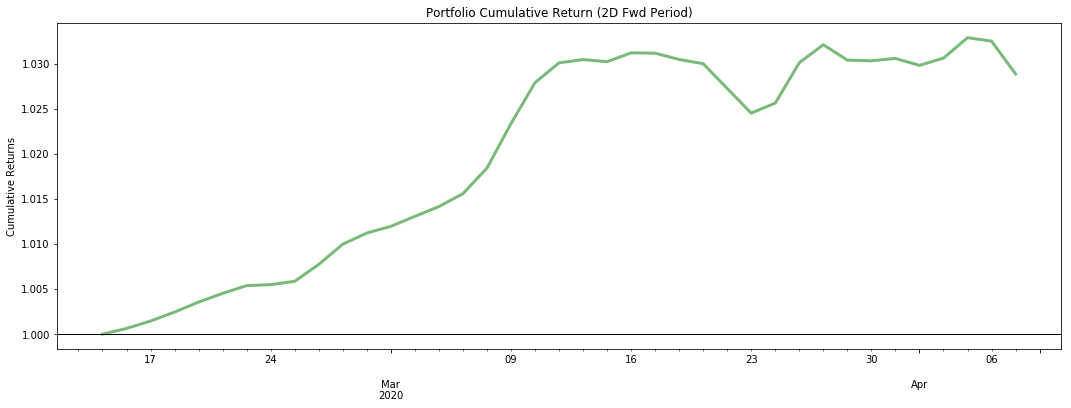

In [76]:
#variable useful to calculate the sharpe ratio
FactorLsReturns = al.performance.factor_returns(factor_data)

#alphalens simple ploting
al.plotting.plot_cumulative_returns(FactorLsReturns[hold_period],
                                    hold_period,
                                    freq=pd.tseries.offsets.BDay());

##full report | uncomment to see it
#tears.create_full_tear_sheet(factor_data)

***

***

In [140]:
def sharpe_ratio(factor_returns,
                 annualization_factor=np.sqrt(252)):
    """
    Get the sharpe ratio for each factor for the entire period

    Parameters
    ----------
    factor_returns : DataFrame
    
        Factor returns for each factor and date
        Remember to call the returns obtained 
        during the alphalens-backtest
        of the alpha-factor you want to assess.
        Normally, FactorLsReturns["nD"] where 'n'
        means the hold_period of returns.
        
    annualization_factor: float
        Annualization Factor
        
        IMPORTANT
        ---------
        This annualization factor extends
        the returns we've already obtained
        during the alphalens 'nD' forward returns computation.
        The core idea is to try to represent
        the first part of the Sharpe Ratio Formula,
        which is defined as follows:
        
        (Rp - Rf) or Return Portfolio - R.Free Rate
        
        Thus, as long as we don't know the "Portfolio Return"
        of the future, we use the mean of returns obtained 
        during the alphalens-backtesting process to do this.
        We multiply this value by "annualization_factor"
        as a way to extend this mean of returns for a year.
        
        The idea is to replicate the real returns that would be 
        obtained if we knew the forward returns of the portfolio 
        and, in addition, discounted the R. Free Rate.
        
        We will call this "relativePortfolio_return"

    Returns
    -------
    sharpe_ratio : float Sharpe Ratio value
    """
    
    relativePortfolio_return=(annualization_factor*factor_returns.mean())
    std_portfolio_returns = factor_returns.std()
    
    sharpe_ratio=relativePortfolio_return/std_portfolio_returns
    
    return sharpe_ratio

In [141]:
#sharpe_ratio(FactorLsReturns["2D"])

5.9836795899711435

***

### Optimal Portfolio Construction - Constrains and Risk Model

Finally, we have an alpha model and a risk model. 

With these tons of information, we will _**build a portfolio that trades as close as possible to the alpha model, but with some restrictions measured by the risk model**_. 

This means, we _optimize the original equal Dollar Neutral Weigthed portfolio_.

To do this, we construct an Not-Nule Abstract Class that includes all the functionalities to find the Optimal Asset Holdings.

This will be called `AbstractOptimalHoldings` class.

In [78]:
import cvxpy as cvx

In [142]:
from abc import ABC, abstractmethod

class AbstractOptimalHoldings(ABC):    
    @abstractmethod
    def _get_obj(self, weights, alpha_vector):
        """
        Get the objective function

        Parameters
        ----------
        weights : CVXPY Variable
            Portfolio weights
        alpha_vector : DataFrame
            Alpha vector

        Returns
        -------
        objective : CVXPY Objective
            Objective function
        """
        
        raise NotImplementedError()
    
    @abstractmethod
    def _get_constraints(self, weights, factor_betas, risk):
        """
        Get the constraints

        Parameters
        ----------
        weights : CVXPY Variable
            Portfolio weights
        factor_betas : 2 dimensional Ndarray
            Factor betas
        risk: CVXPY Atom
            Predicted variance of the portfolio returns
                
        Here we will compute some definitions, like
        long-short portfolio, long only, and so on.
        
        Returns
        -------
        constraints : List of CVXPY Constraint
            Constraints
        
        IMPORTANT
        -------
        This function is empty. We will fill this later.
        If this is empty, an error message will raise.
        """
        
        raise NotImplementedError()
        
    def _get_risk(self, weights, factor_betas, alpha_vector_index, factor_cov_matrix, idiosyncratic_var_vector):
        f = factor_betas.loc[alpha_vector_index].values.T * weights
        X = factor_cov_matrix
        S = np.diag(idiosyncratic_var_vector.loc[alpha_vector_index].values.flatten())

        return cvx.quad_form(f, X) + cvx.quad_form(weights, S)
    
    def find(self, alpha_vector,factor_betas, factor_cov_matrix, idiosyncratic_var_vector):
        weights = cvx.Variable(len(alpha_vector))
        risk = self._get_risk(weights, factor_betas, alpha_vector.index, factor_cov_matrix, idiosyncratic_var_vector)
        
        obj = self._get_obj(weights, alpha_vector)
        constraints = self._get_constraints(weights, factor_betas.loc[alpha_vector.index].values, risk)
        
        prob = cvx.Problem(obj, constraints)
        prob.solve(max_iters=500)

        optimal_weights = np.asarray(weights.value).flatten()
        
        return pd.DataFrame(data=optimal_weights,
                            index=alpha_vector.index)

In [80]:
class OptimalHoldings(AbstractOptimalHoldings):
    def _get_obj(self, weights, alpha_vector):
        """
        Get the objective function

        Parameters
        ----------
        weights : CVXPY Variable
            Portfolio weights
        alpha_vector : DataFrame
            Alpha vector

        Returns
        -------
        objective : CVXPY Objective
            Objective function
        """
        assert(len(alpha_vector.columns) == 1)

        objective = cvx.Maximize(np.array(alpha_vector.T) * weights)
        
        return objective
    
    def _get_constraints(self, weights, factor_betas, risk):
        """
        Get the constraints

        Parameters
        ----------
        weights : CVXPY Variable
            Portfolio weights
        factor_betas : 2 dimensional Ndarray
            Factor betas
        risk: CVXPY Atom
            Predicted variance of the portfolio returns

        Returns
        -------
        constraints : List of CVXPY Constraint
            Constraints
        """
        assert(len(factor_betas.shape) == 2)
        
        constraints = [risk <= self.risk_cap**2,
                       np.array(factor_betas.T) * weights <= self.factor_max,
                       np.array(factor_betas.T) * weights >= self.factor_min,
                       sum(weights)== 0,
                       sum(cvx.abs(weights))<=1,
                       weights <= self.weights_max,
                       weights >= self.weights_min]
        
        return constraints

    def __init__(self, risk_cap=0.05, factor_max=10.0, factor_min=-10.0, weights_max=0.55, weights_min=-0.55):
        self.risk_cap=risk_cap
        self.factor_max=factor_max
        self.factor_min=factor_min
        self.weights_max=weights_max
        self.weights_min=weights_min

In [162]:
results

ML     ML_v2   Returns  \
date                      asset                                              
2020-02-12 00:00:00+00:00 Equity(0 [A])       0.516008 -0.516008  0.023964   
                          Equity(1 [AA])     -1.273782  1.273782  0.016982   
                          Equity(2 [AAL])    -0.321152  0.321152  0.030862   
                          Equity(3 [AAP])    -0.537659  0.537659 -0.009155   
                          Equity(4 [AAPL])    0.176814 -0.176814  0.029983   
                          Equity(5 [ABBV])   -0.494357  0.494357  0.031399   
                          Equity(6 [ABC])     0.905720 -0.905720  0.028680   
                          Equity(7 [ABMD])   -0.487140  0.487140 -0.062450   
                          Equity(8 [ABT])    -0.811901  0.811901  0.016397   
                          Equity(9 [ACN])     0.285067 -0.285067  0.015177   
                          Equity(10 [ADBE])  -0.530442  0.530442  0.020769   
                          Equity(11 [ADI])    0.155163 -0.155163  0.022901   
                          Equity(12 [ADM])    0.920154 -0.920154  0.006579   
                          Equity(13 [ADP])   -1.670711  1.670711  0.008900   
                          Equity(14 [ADS])    0.718081 -0.718081 -0.012870   
                          Equity(15 [ADSK])   1.425337 -1.425337  0.000531   
                          Equity(16 [AEO])    0.371670 -0.371670  0.009129   
                          Equity(17 [AEP])    1.389252 -1.389252  0.003246   
                          Equity(18 [AES])    0.833551 -0.833551  0.005366   
                          Equity(19 [AFL])   -1.584108  1.584108  0.001136   
                          Equity(20 [AGN])   -0.862419  0.862419  0.014610   
                          Equity(21 [AGNC])   1.634626 -1.634626 -0.014987   
                          Equity(22 [AIG])   -0.566526  0.566526  0.016461   
                          Equity(23 [AKAM])  -0.097428  0.097428  0.005750   
                          Equity(24 [ALB])   -0.523225  0.523225  0.007941   
                          Equity(25 [ALGN])   1.115010 -1.115010  0.006828   
                          Equity(26 [ALK])    1.331517 -1.331517  0.014636   
                          Equity(27 [ALL])   -1.331517  1.331517 -0.003539   
                          Equity(28 [ALXN])  -0.956238  0.956238  0.009986   
                          Equity(29 [AMAT])   0.205681 -0.205681  0.041257   
...                                                ...       ...       ...   
2020-04-15 00:00:00+00:00 Equity(450 [WBA])   0.559309 -0.559309  0.024892   
                          Equity(451 [WDAY])  1.187179 -1.187179  0.038499   
                          Equity(452 [WDC])   1.317083 -1.317083  0.011068   
                          Equity(453 [WEC])  -0.104645  0.104645  0.003512   
                          Equity(454 [WELL]) -0.422188  0.422188 -0.056507   
                          Equity(455 [WFC])  -1.035624  1.035624 -0.033414   
                          Equity(456 [WHR])   1.360385 -1.360385 -0.007351   
                          Equity(457 [WLL])   0.927371 -0.927371 -0.052632   
                          Equity(458 [WM])   -1.540807  1.540807 -0.008430   
                          Equity(459 [WMB])   0.660346 -0.660346  0.010047   
                          Equity(460 [WMT])   0.472707 -0.472707  0.048075   
                          Equity(461 [WPX])  -1.179962  1.179962 -0.069869   
                          Equity(462 [WSM])   1.569674 -1.569674  0.041298   
                          Equity(463 [WU])    1.064492 -1.064492  0.015431   
                          Equity(464 [WY])    1.728446 -1.728446 -0.025310   
                          Equity(465 [WYNN]) -1.432553  1.432553  0.032947   
                          Equity(466 [X])    -1.259348  1.259348  0.000000   
                          Equity(467 [XEC])  -0.956238  0.956238  0.017666   
                          Equity(468 [XEL])  -1.115010  1.115010 -0.010066

In [164]:
lastDayData = results[["ML"]].loc[results[["ML"]].index.get_level_values(0)[-1]]

In [106]:
lastDayData = results.loc[results.index.get_level_values(0)[-1]]
alpha_vector = lastDayData[['ML']]

In [175]:
results[["ML"]].index.get_level_values(0)[0].date().strftime("%Y/%m/%d")

'2020/02/12'

                             0
asset                         
Equity(0 [A])     2.846541e-12
Equity(1 [AA])    6.281466e-12
Equity(2 [AAL])   2.026480e-03
Equity(3 [AAP])  -7.790465e-12
Equity(4 [AAPL])  5.320275e-12

The portfolio weights is not well-allocated along the assets
X axis: asset | Y axis: weights-allocation


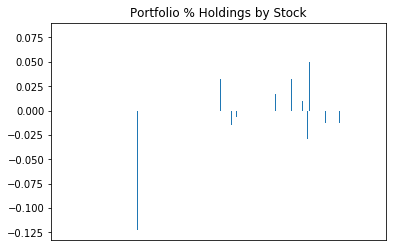

In [121]:
optimal_weights = OptimalHoldings().find(
    alpha_vector,
    risk_model['factor_betas'],
    risk_model['factor_cov_matrix'],
    risk_model['idiosyncratic_var_vector']
)
print(optimal_weights.head())
optimal_weights.plot.bar(legend=None,
                         title='Portfolio % Holdings by Stock')
x_axis = plt.axes().get_xaxis()
x_axis.set_visible(False)
print("\nThe portfolio weights is not well-allocated along the assets")
print("X axis: asset | Y axis: weights-allocation")

## Optimization with a Regularization Parameter
In order to enforce diversification, we'll use regularization in the objective function. We'll create a new class called `OptimalHoldingsRegualization` which gets its constraints from the `OptimalHoldings` class in the function `_get_constraints()`. In this new class, implement the `_get_obj` function to return a CVXPY objective function that maximize alpha. 

This is $ \lambda\|x\|_2\ - \alpha^T * x $, where $ x $ is the portfolio weights, $ \alpha $ is the alpha vector, and $ \lambda $ is the regularization parameter.

**Note:** * $ \lambda $ is located in `self.lambda_reg`. *

In [130]:
class OptimalHoldingsRegualization(OptimalHoldings):
    def _get_obj(self, weights, alpha_vector):
        """
        Get the objective function
        The core idea of optimization is to compute
        a min/max approximation for a global minimum 
        (or global maximum) of a function f(x).
        
        This function f(x) is our base model computed.
        
        Remember: 'lambda_reg' is regularization parameter
        this will allows you to limit your exposure

        Parameters
        ----------
        weights : CVXPY Variable
            Portfolio weights
        alpha_vector : DataFrame
            Alpha vector
        
        Calculation Variables
        ---------------------
        weighted_alpha_vector: "alfa transpuesto x X"
            This variable computes the AlphaVector (with alpha values)
            multiply by its predefined weights.
            Remember that these weights were computed as constraints.
            You can define the constraints while you call this class.
        
        weighted_alpha_return_vector: "alpha x ||x|| en 2 dim.: buy/sell"
            This variable computes the optimized vector for alphas
            based on the obtained returns. 
            The core idea here is to weight more the alphas 
            in which proven returns were higher during the backtest
            rather than those whose returns were not so good.
            This process is possible trying a cvx.pnorm(v,n) statement, 
            that transforms the matrix of weights 'v'
            into a vector reordered by 'n' columns to compute
            the p-norm value: a value that represents the nonnegative real
            numbers that satisfies certain properties pertaining 
            to scalability and additivity. In this case, 
            we are talking about the best performance properties: 
            that's why we multiply it versus the alpha returns
            to obtaint a vector of two dimensions| buy and sell.
            
        In the end, we call the "Minimize" cvx function to, effectivelly,
        find the min value of the function that will compute the best
        possible weights for each factor.

        Returns
        -------
        objective : CVXPY Objective
            Objective function
        """
        assert(len(alpha_vector.columns) == 1)
        
        weighted_alpha_vector=alpha_vector.T.values[0]*weights 
        weighted_alpha_return_vector=self.lambda_reg*cvx.pnorm(weights,
                                                              2)
        return cvx.Minimize(weighted_alpha_return_vector-
                            weighted_alpha_vector)

    def __init__(self, lambda_reg=0.5,
                 risk_cap=0.05, 
                 factor_max=10.0, 
                 factor_min=-10.0, 
                 weights_max=0.55, #compute predefined weights here | max
                 weights_min=-0.55):#compute predefined weights here | min 
        
        self.lambda_reg = lambda_reg
        self.risk_cap=risk_cap
        self.factor_max=factor_max
        self.factor_min=factor_min
        self.weights_max=weights_max
        self.weights_min=weights_min


The portfolio weights is better allocated along the assets
X axis: assets | Y axis: weights-allocation


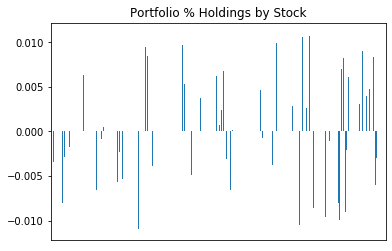

In [131]:
optimal_weights_1 = OptimalHoldingsRegualization(lambda_reg=5.0).find(
    alpha_vector, 
    risk_model['factor_betas'], 
    risk_model['factor_cov_matrix'], 
    risk_model['idiosyncratic_var_vector']
)

optimal_weights_1.plot.bar(legend=None,
                           title='Portfolio % Holdings by Stock')
x_axis = plt.axes().get_xaxis()
x_axis.set_visible(False)
print("\nThe portfolio weights is better allocated along the assets")
print("X axis: assets | Y axis: weights-allocation")

Check that in the above example, altough we didn't provide strict constraints, we obtained a better weight diversification among the assets. However, it's extremely useful to compute more realistic constraints, such as "max weight" for some assets, the capital you want to put on risk ("risk_cap"), and so on. Here is an example how: 

**Optimize with a Strict Factor Constratins and Target Weighting**

## Optimize with a Strict Factor Constraints and Target Weighting
Another common formulation is to take a predefined target weighting, $x^*$ (e.g., a quantile portfolio), and solve to get as close to that portfolio while respecting portfolio-level constraints. For this next class, `OptimalHoldingsStrictFactor`, you'll implement the `_get_obj` function to minimize on on $ \|x - x^*\|_2 $, where $ x $ is the portfolio weights  $ x^* $ is the target weighting.

In [132]:
class OptimalHoldingsStrictFactor(OptimalHoldings):
    def _get_obj(self, weights, alpha_vector):
        """
        Get the objective function
        
        The advisible function for find right weights!

        Parameters
        ----------
        weights : CVXPY Variable
            Portfolio weights
        alpha_vector : DataFrame
            Alpha vector

        Returns
        -------
        objective : CVXPY Objective
            Objective function
            
        Important
        ---------
        This calculation do the same as the previous class.
        The main difference is that here we return an optimal
        weight allocation based on a predefined weights structure.
        
        The first variable computes all the alpha factor values 
        in a single matrix ("[:,0]").
        
        The second variables extract the mean of this alpha factor values
        and divides it by it absolute sum. 
        
        With this, we can calculate the weights of our portfolio.
        Check that, in the end, we use the same "cvx.pnorm" notation.
        This means that we also will find the optimal vector
        that represents each asset and, with this information, 
        we can optimize our f(x) function: the portfolio function.
        
        """
        assert(len(alpha_vector.columns) == 1)
        
        #TODO: Implement function
        alpha_vec_vals=alpha_vector.values[:,0]
        x_star=(
            (alpha_vec_vals-np.mean(alpha_vec_vals))
            /sum(abs(alpha_vec_vals))
        )
        return cvx.Minimize(cvx.pnorm(weights-x_star,2))

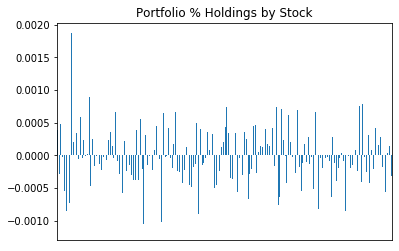

In [134]:
#check how here we define the differente constraints
optimal_weights_2 = OptimalHoldingsStrictFactor(
    weights_max=0.02,
    weights_min=-0.02,
    risk_cap=0.0015,
    factor_max=0.015,
    factor_min=-0.015).find(alpha_vector, risk_model['factor_betas'], risk_model['factor_cov_matrix'], risk_model['idiosyncratic_var_vector'])

optimal_weights_2.plot.bar(legend=None, title='Portfolio % Holdings by Stock')
x_axis = plt.axes().get_xaxis()
x_axis.set_visible(False)


In [139]:
optimal_weights_2 #* 1000000

,0
asset,
Equity(0 [A]),0.000388
Equity(1 [AA]),0.000150
Equity(2 [AAL]),0.000268
Equity(3 [AAP]),-0.000278
Equity(4 [AAPL]),0.000483
Equity(5 [ABBV]),0.000278
Equity(6 [ABC]),0.000126
Equity(7 [ABMD]),-0.000024
Equity(8 [ABT]),-0.000468


***